# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Datasets

In [2]:
dataset=pd.read_csv("E:\Edu\Data Science and ML\Machinelearningaz\Datasets\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\\Position_Salaries.csv")
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.shape

(10, 3)

In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
X=dataset.iloc[:,1:2].values    #  (Matrix)
y=dataset.iloc[:,2].values    #  (Vector)
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Fitting SVR model

In [6]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')   #Non linera so use rbf
regressor.fit(X,y)

C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

# Predicting new Result with Linear Regression

In [7]:
regressor.predict(np.array([[6.5]]))   #Not good

array([130001.55760156])

# Visualising the Polynomial Regression results

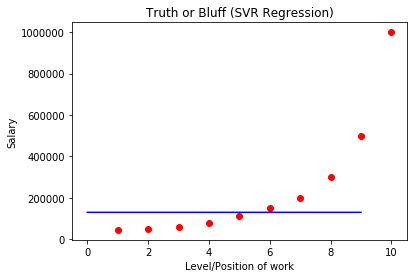

In [8]:
plt.scatter(X,y,color='red')
plt.plot(regressor.predict(X),color='blue')
plt.title("Truth or Bluff (SVR Regression)")
plt.xlabel('Level/Position of work')
plt.ylabel('Salary')
plt.show()

In [9]:
dataset=pd.read_csv("E:\Edu\Data Science and ML\Machinelearningaz\Datasets\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\\Position_Salaries.csv")
dataset.head()

X=dataset.iloc[:,1:2].values    #  (Matrix)
y=dataset.iloc[:,2:3].values    #  (Vector)
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature scaling 

In [10]:
# Feature scaling is not included in SVR class so apply feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()

X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)


C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')   #Non linera so use rbf
regressor.fit(X,y)

C:\Users\Jakkani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
ans=sc_y.inverse_transform(regressor.predict(sc_X.fit_transform(np.array([[6.5]])))) 
print(ans)

[131106.77303274]


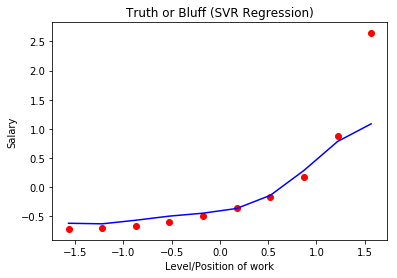

In [14]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("Truth or Bluff (SVR Regression)")
plt.xlabel('Level/Position of work')
plt.ylabel('Salary')
plt.show()